In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("newplacementdata - newplacementdata.csv")

In [3]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1


In [4]:
import matplotlib.pyplot as  plt
import seaborn as sns

In [5]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

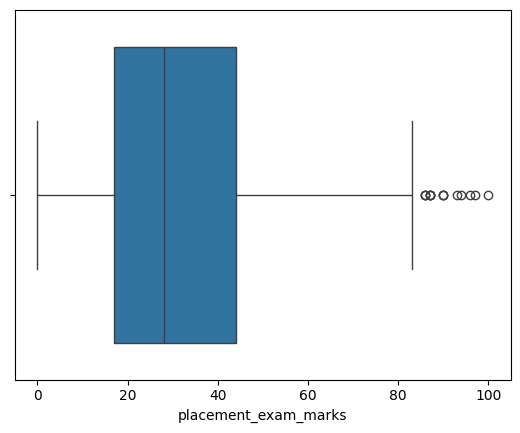

In [6]:
sns.boxplot(x=df["placement_exam_marks"])

In [7]:
#Finding the IQR
percentile25=df["placement_exam_marks"].quantile(0.25)
percentile75=df["placement_exam_marks"].quantile(0.75)

In [9]:
percentile25

np.float64(17.0)

In [10]:
percentile75

np.float64(44.0)

In [11]:
IQR=percentile75-percentile25
IQR

np.float64(27.0)

In [13]:
upper_limit=percentile75+1.5*IQR
upper_limit

np.float64(84.5)

In [14]:
lower_limit=percentile25-1.5*IQR
lower_limit

np.float64(-23.5)

**Finding Our Outliers**

In [15]:
df[df["placement_exam_marks"]>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [16]:
df[df["placement_exam_marks"]<lower_limit]

,cgpa,placement_exam_marks,placed


In [17]:
# Triming --->4(Lower)....1 , upper(25).....(50)  --->here1,50  are outliers--->
# Lower(4)<-----> upper(25)mid data.

# capping--->4(lower)....1 , upper(25)....(50)---> capping  lower point lowest point(1)
# upper  point upper  point(50)   --->Range expand ---> outliers remove.

In [18]:
#Triming (outer Removing technique 1)

In [20]:
newdf=df[df["placement_exam_marks"]<upper_limit]

In [21]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [22]:
# Comparision

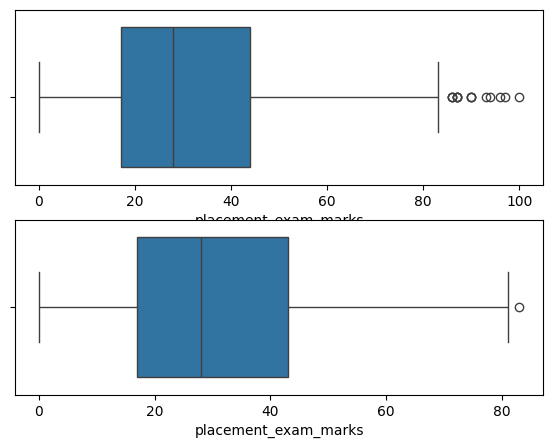

In [23]:
plt.figure(figsize =(15,5))

plt.subplot(222)
sns.boxplot(x=df["placement_exam_marks"])

plt.subplot(224)
sns.boxplot(x=newdf["placement_exam_marks"])
plt.show()

In [24]:
# Capping(Outlier Removinng technique 2)

In [25]:
new_df_cap=df.copy()

In [26]:
#min=5  , max15

#min 4,3,1
# Max=20  ,30 ,50

# updated_min_value=1
# updated_max_value=50

In [33]:
new_df_cap["placement_exam_marks"]=np.where(

    new_df_cap["placement_exam_marks"]>upper_limit,
    upper_limit ,

    np.where(
    new_df_cap["placement_exam_marks"]<lower_limit  ,
    lower_limit ,
    new_df_cap["placement_exam_marks"])
)

In [35]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [36]:
new_df_cap.shape

(1000, 3)

In [37]:
df=pd.read_csv("titanic - titanic.csv")

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

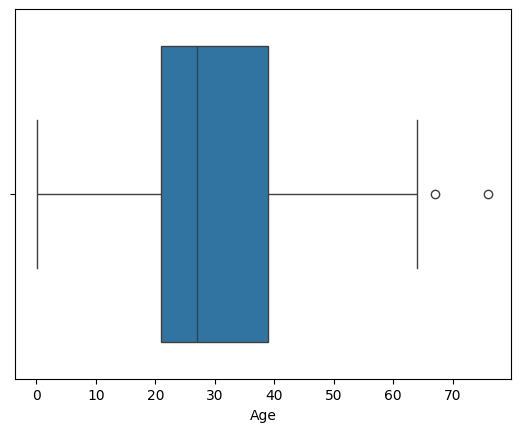

In [41]:
sns.boxplot(x=df["Age"])

In [45]:
percentile25=df["Age"].quantile(0.25)
percentile75=df["Age"].quantile(0.75)

In [46]:
percentile25

np.float64(21.0)

In [47]:
percentile75

np.float64(39.0)

In [48]:
IQR=percentile75-percentile25

In [49]:
IQR

np.float64(18.0)

In [51]:
upper_limit=percentile75+1.5*IQR

In [52]:
upper_limit

np.float64(66.0)

In [54]:
lower_limit=percentile25-1.5*IQR

In [55]:
lower_limit

np.float64(-6.0)

In [57]:
df[df["Age"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [58]:
df[df["Age"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [59]:
# triming


In [ ]:
new_df=s